In [ ]:
import pandas as pd
from datetime import datetime
from plotnine import *

1.   Qual a ‘evolução’ da população carcerária do Brasil?

In [ ]:
df_infogeral = pd.read_csv('dados/df_infogeral.csv', na_values = ["NI", "-"]) # RR, RO e RJ com menos observ
#df_infogeral['mes_num'] = '12'
#df_infogeral['mes_num'][df_infogeral['mes'] == "jun"] = '06'


def transf_data(x):
  obj = x['mes_num'] + '-' + str(x['ano'])
  date = datetime.strptime(obj, '%m-%Y')
  return date

#df_infogeral['ano_mes_data'] = df_infogeral.apply(transf_data, axis = 1)
df_infogeral

,level,value,uf,mes,ano,var
0,População carcerária,4244.000000,ac,dez,2014,pop
1,População carcerária por 100.000 habitantes,535.130889,ac,dez,2014,pop
2,População carcerária,3488.000000,ac,jun,2014,pop
3,População carcerária por 100.000 habitantes,441.462547,ac,jun,2014,pop
4,População carcerária,4649.000000,ac,dez,2015,pop
...,...,...,...,...,...,...
691,População carcerária por 100.000 habitantes,291.951126,to,jun,2019,pop
692,População carcerária,4126.000000,to,dez,2020,pop
693,População carcerária por 100.000 habitantes,259.456387,to,dez,2020,pop
694,População carcerária,4308.000000,to,jun,2020,pop


In [ ]:
pop_carc_abs = df_infogeral[df_infogeral['level'] == 'População carcerária']
pop_carc_abs = pop_carc_abs.query('mes == "dez"')
pop_carc_sum = pop_carc_abs.groupby(['ano'], as_index = False).agg(total = ('value', 'sum'))

In [ ]:
pop_carc_sum

,ano,total
0,2014,621805.0
1,2015,698186.0
2,2016,721609.0
3,2017,722169.0
4,2018,740540.0
5,2019,754601.0
6,2020,811113.0


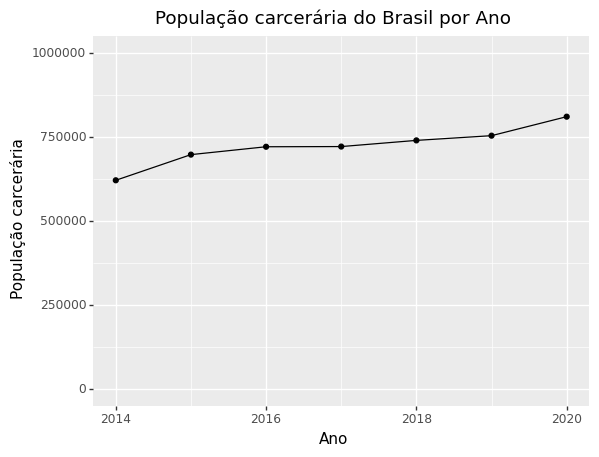

<ggplot: (8730523714537)>

In [ ]:
# Graf linhas
(
ggplot(data = pop_carc_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "População carcerária do Brasil por Ano", 
       x = "Ano", 
       y = "População carcerária")
+ ylim([0, 1000000])
#+ theme(axis_text_x = element_text(rotation = 90))
)

2. Quais os estados com maiores populações carcerárias segundo o dado mais recente?

In [ ]:
# 2020
pop_carc_abs_dez2020 = pop_carc_abs.query(' ano == 2020 & mes == "dez"').sort_values(by = 'value', ascending = False)
pop_carc_abs_dez2020.to_csv('tab/pop_carc_abs_dez2020.csv', index = False)
pop_carc_abs_dez2020[['uf', 'value']]

3. Quais os estados com maiores populações carcerárias proporcionalmente à sua população segundo o dado mais recente?

In [ ]:
pop_carc_prop_dez2020 = df_infogeral.query(' ano == 2020 & mes == "dez" & level != "População carcerária"').sort_values(by = 'value', ascending = False)
pop_carc_prop_dez2020.to_csv('tab/pop_carc_prop_dez2020.csv', index = False)
pop_carc_prop_dez2020[['uf', 'value']]

,uf,value
179,df,903.229270
23,ac,902.657440
309,ms,722.006240
539,ro,698.540463
563,rr,655.913280
465,pr,632.343594
205,es,596.645909
335,mt,481.308597
667,sp,461.866668
231,go,444.546597


4. Qual estado teve maior crescimento da sua população carcerária?

In [ ]:
# TO DO

5. Qual a evolução do número de consultas de psicologia?

In [ ]:
df_cons = pd.read_csv('dados/df_cons.csv', na_values = ["NI", "-"]) 
df_cons = df_cons[['level', 'total', 'uf', 'mes', 'ano']]
df_cons = df_cons.rename({'total':'value'}, axis = 'columns')
df_cons

,level,value,uf,mes,ano
0,Consultas psicológicas,1036.0,ac,dez,2014
1,Consultas psicológicas,212.0,ac,jun,2014
2,Consultas psicológicas,921.0,ac,dez,2015
3,Consultas psicológicas,229.0,ac,dez,2016
4,Consultas psicológicas,323.0,ac,jun,2016
...,...,...,...,...,...
345,Consultas psicológicas,935.0,to,jun,2018
346,Consultas psicológicas,1170.0,to,dez,2019
347,Consultas psicológicas,898.0,to,jun,2019
348,Consultas psicológicas,822.0,to,dez,2020


In [ ]:
df_cons_ano = df_cons.groupby(['ano', 'uf'], as_index = False).agg(total = ('value', 'sum'))
df_cons_ano.sort_values('total', ascending = False)

,ano,uf,total
79,2016,sp,153057.0
106,2017,sp,144615.0
52,2015,sp,131110.0
160,2019,sp,129666.0
133,2018,sp,121957.0
...,...,...,...
75,2016,rr,79.0
48,2015,rr,11.0
45,2015,rj,0.0
90,2017,ma,0.0


In [ ]:
df_cons_ano_min_max = df_cons_ano.groupby(['uf'], as_index = False).agg({'total':['min', 'max']})
df_cons_ano_min_max
#df_cons_ano_min_max.sort_values('max', ascending = False)

uf    total          
            min       max
0   ac    552.0    3761.0
1   al   7665.0   10704.0
2   am   9639.0   32560.0
3   ap     79.0    1374.0
4   ba  24885.0   46381.0
5   ce   5795.0   42326.0
6   df   4498.0    7239.0
7   es  12559.0   41219.0
8   go   1555.0   10661.0
9   ma      0.0   52481.0
10  mg  56853.0   94825.0
11  ms   9795.0   16360.0
12  mt   3648.0   14256.0
13  pa  16165.0   25272.0
14  pb   6337.0   11627.0
15  pe  26456.0   41245.0
16  pi   1044.0    3587.0
17  pr   6783.0   13776.0
18  rj      0.0   21631.0
19  rn    227.0    5893.0
20  ro    340.0    3082.0
21  rr     11.0    1520.0
22  rs  27794.0   76344.0
23  sc  17807.0   27095.0
24  se   1622.0   11630.0
25  sp  79714.0  153057.0
26  to   1483.0    2718.0

In [ ]:
# Todas as consultas por ano
cons_sum = df_cons_ano.groupby(['ano'], as_index = False).agg(total = ('total', 'sum'))
cons_sum

,ano,total
0,2014,439024.0
1,2015,429925.0
2,2016,537119.0
3,2017,537994.0
4,2018,477353.0
5,2019,620019.0
6,2020,586165.0


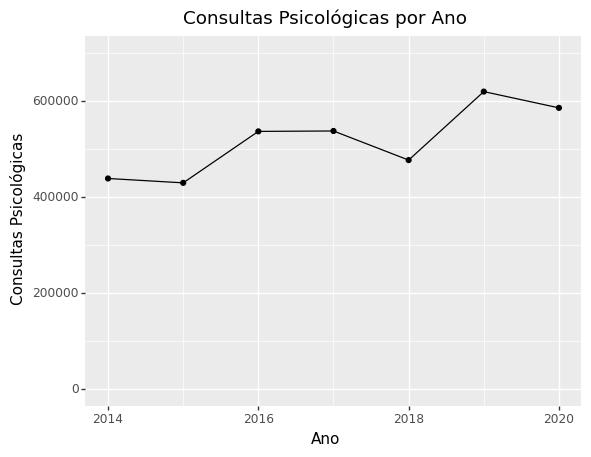

<ggplot: (8730522549977)>

In [ ]:
(
ggplot(data = cons_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Consultas Psicológicas por Ano", 
       x = "Ano", 
       y = "Consultas Psicológicas")
+ ylim([0, 700000])
#+ theme(axis_text_x = element_text(rotation = 90))
)

6. Qual a evolução do número de suicídios?

In [ ]:
df_suic = pd.read_csv('dados/df_suic.csv', na_values = ["NI", "-"]) 
df_suic = df_suic[['level', 'total', 'uf', 'mes', 'ano']]
df_suic = df_suic.rename({'total':'value'}, axis = 'columns')
df_suic = df_suic[df_suic['level'].str.contains('suicídios', na = False)]

In [ ]:
df_suic.query('uf == "al" ')

,level,value,uf,mes,ano
67,Óbitos suicídios,0.0,al,dez,2014
72,Óbitos suicídios,1.0,al,jun,2014
77,Óbitos suicídios,1.0,al,dez,2015
82,Óbitos suicídios,1.0,al,dez,2016
87,Óbitos suicídios,0.0,al,jun,2016
92,Óbitos suicídios,0.0,al,dez,2017
97,Óbitos suicídios,1.0,al,jun,2017
102,Óbitos suicídios,1.0,al,dez,2018
107,Óbitos suicídios,1.0,al,jun,2018
112,Óbitos suicídios,0.0,al,dez,2019


In [ ]:
df_suic = df_suic.dropna(subset = ["value"])
df_suic_ano =  df_suic.groupby(['uf', 'ano'], as_index = False).agg(total = ('value', 'sum'))
df_suic_ano

,uf,ano,total
0,ac,2014,2.0
1,ac,2015,0.0
2,ac,2016,1.0
3,ac,2017,0.0
4,ac,2018,1.0
...,...,...,...
184,to,2016,5.0
185,to,2017,0.0
186,to,2018,0.0
187,to,2019,1.0


In [ ]:
df_suic_ano_min_max = df_suic_ano.groupby(['uf'], as_index = False).agg({'total':['min', 'max']})
df_suic_ano_min_max

uf total      
         min   max
0   ac   0.0   2.0
1   al   0.0   3.0
2   am   0.0   4.0
3   ap   0.0   0.0
4   ba   5.0   9.0
5   ce   0.0   8.0
6   df   0.0   4.0
7   es   0.0   5.0
8   go   2.0  14.0
9   ma   1.0   8.0
10  mg  18.0  44.0
11  ms   2.0   7.0
12  mt   0.0   4.0
13  pa   2.0  55.0
14  pb   2.0   5.0
15  pe   4.0  11.0
16  pi   0.0   6.0
17  pr   2.0  24.0
18  rj   0.0   5.0
19  rn   1.0   8.0
20  ro   1.0   6.0
21  rr   0.0   1.0
22  rs   4.0  13.0
23  sc   2.0  14.0
24  se   0.0   2.0
25  sp  23.0  35.0
26  to   0.0   5.0

In [ ]:
suic_sum = df_suic_ano.groupby(['ano'], as_index = False).agg(total = ('total', 'sum'))
suic_sum

,ano,total
0,2014,130.0
1,2015,135.0
2,2016,114.0
3,2017,150.0
4,2018,168.0
5,2019,191.0
6,2020,195.0


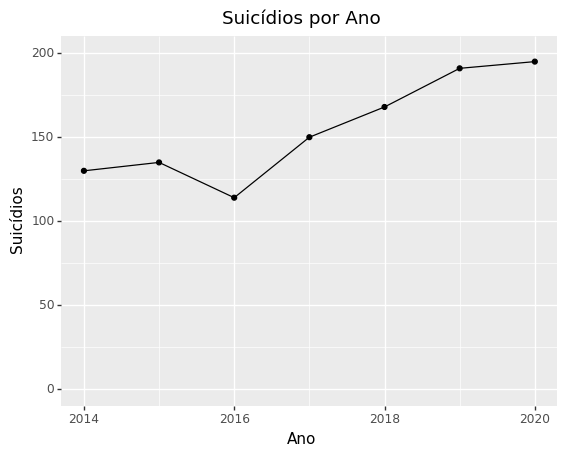

<ggplot: (8730522564001)>

In [ ]:
(
ggplot(data = suic_sum,
       mapping = aes(x = 'ano', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Suicídios por Ano", 
       x = "Ano", 
       y = "Suicídios")
+ ylim([0,200])
#+ theme(axis_text_x = element_text(rotation = 90))
)

Dados Depressão

In [ ]:
# Lendo os dados
sus = pd.read_excel('dados' + '/' + 'atend_sus.xlsx',
                          skiprows = 7)
sus = sus[['ANO', 'UF', 'total geral']]
sus = sus[sus['ANO'] > 2014]
sus = sus[sus['ANO'] < 2021]
sus = sus.groupby(['ANO', "UF"], as_index = False).agg(total = ('total geral', 'sum'))

sus.sort_values(by = 'total', ascending = False)

,ANO,UF,total
94,2020,RS,401
86,2020,MS,296
66,2019,MS,218
63,2019,GO,188
74,2019,RS,177
...,...,...,...
69,2019,PB,0
70,2019,PI,0
21,2017,BA,0
22,2017,CE,0


In [ ]:
sus.subquery('UF == "SP"')

AttributeError: ignored

In [ ]:
sus_sum = sus.groupby(['ANO'], as_index = False).agg(total = ('total', 'sum'))
sus_sum

,ANO,total
0,2015,51
1,2016,118
2,2017,293
3,2018,552
4,2019,1001
5,2020,1417


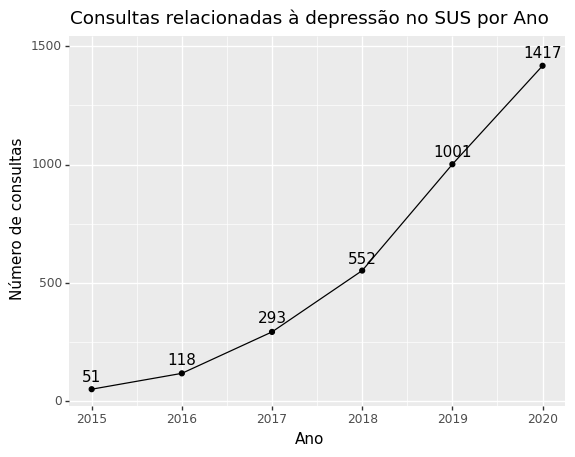

<ggplot: (8730522466601)>

In [ ]:
(
ggplot(data = sus_sum,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ labs(title = "Consultas relacionadas à depressão no SUS por Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ annotate('text', x = 2015, y = 100, label = '51')
+ annotate('text', x = 2016, y = 175, label = '118')
+ annotate('text', x = 2017, y = 350, label = '293')
+ annotate('text', x = 2018, y = 600, label = '552')
+ annotate('text', x = 2019, y = 1050, label = '1001')
+ annotate('text', x = 2020, y = 1470, label = '1417')
#+ ylim([0,200])
#+ theme(axis_text_x = element_text(rotation = 90))
)

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


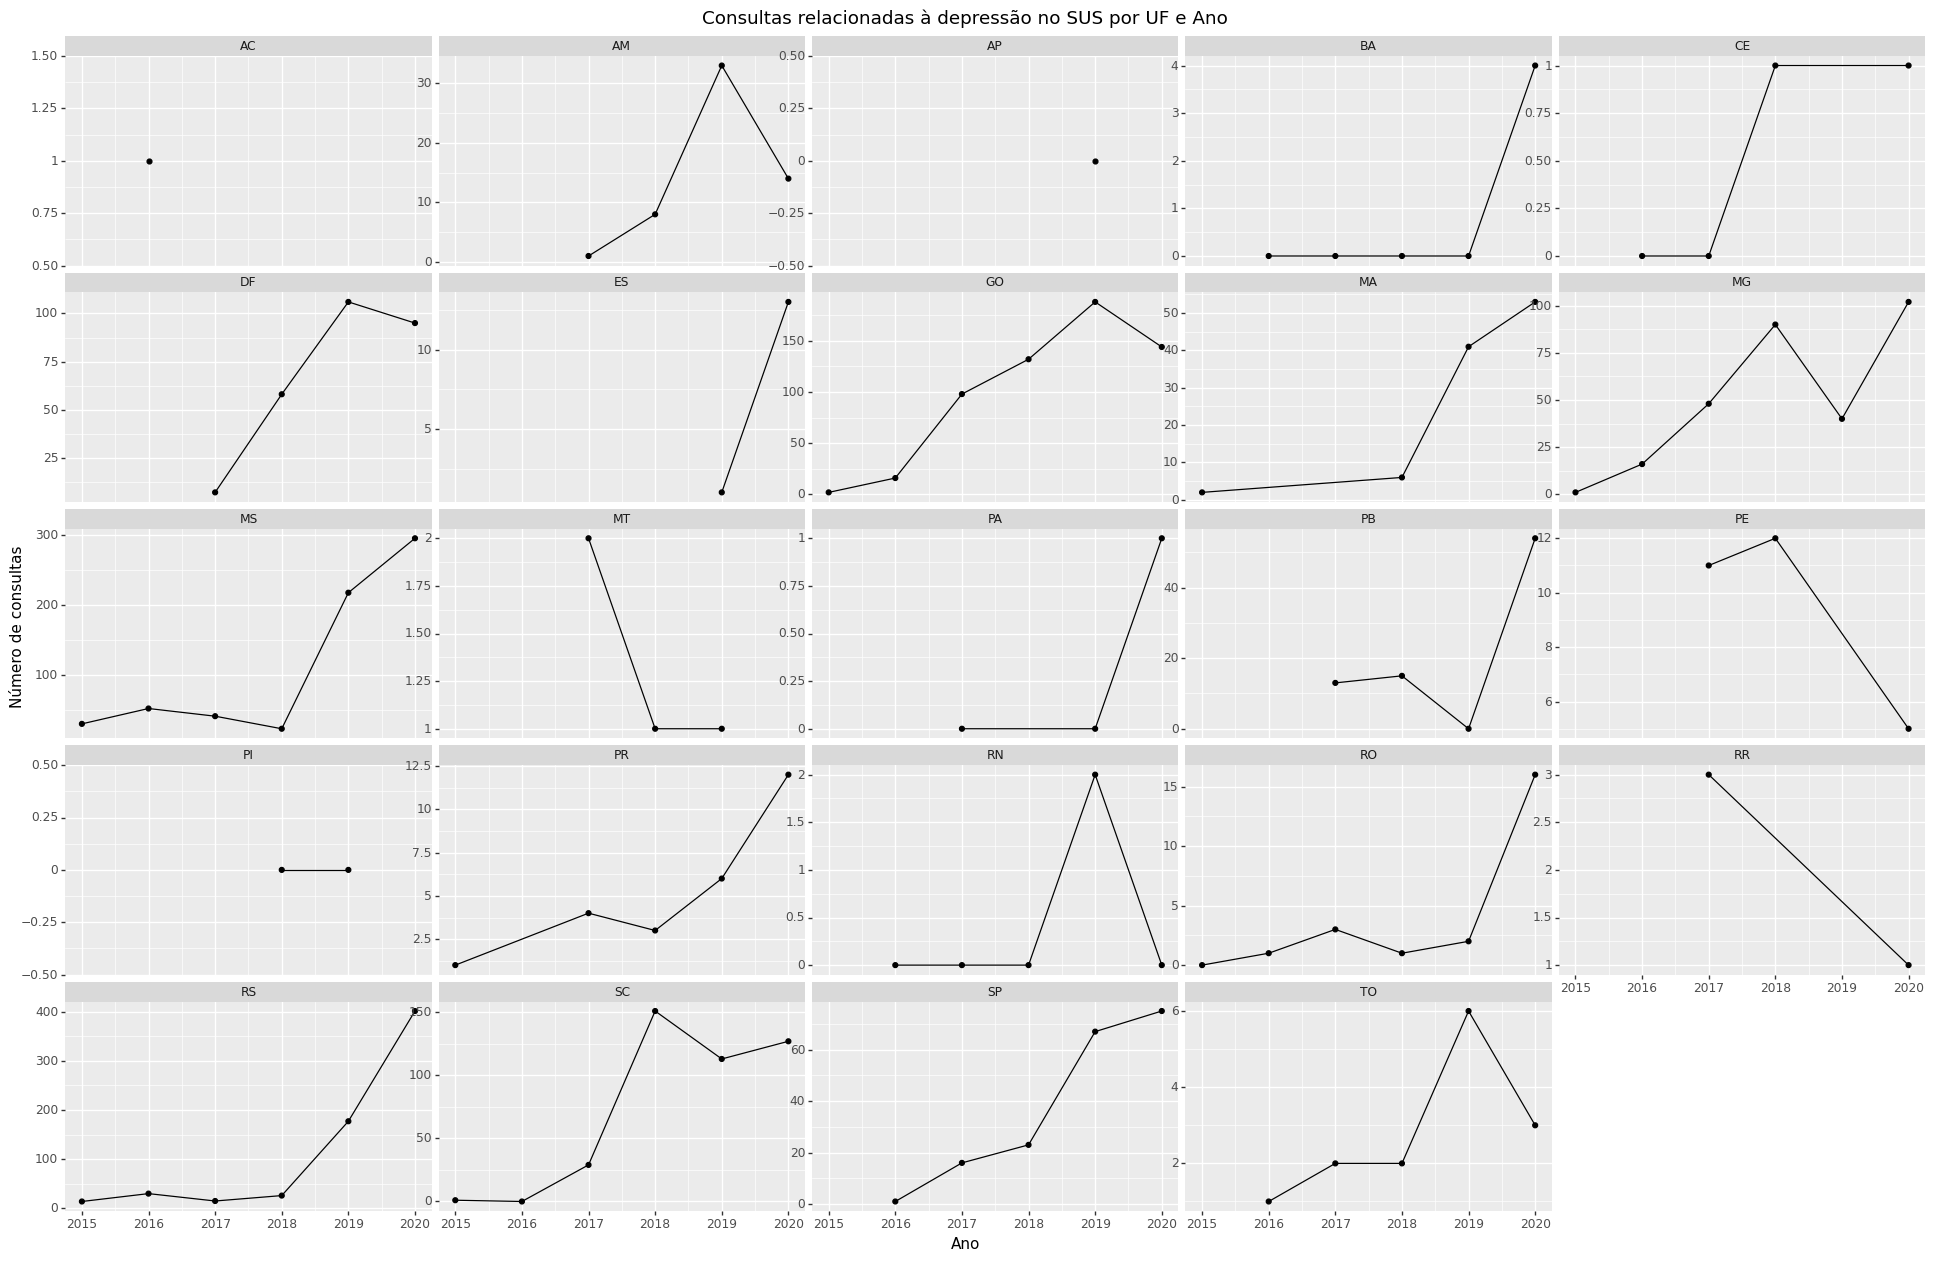

<ggplot: (8730522413041)>

In [ ]:
(
ggplot(data = sus,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ facet_wrap('~ UF', scales = 'free_y')
+ labs(title = "Consultas relacionadas à depressão no SUS por UF e Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ theme(figure_size = (24, 15))
)

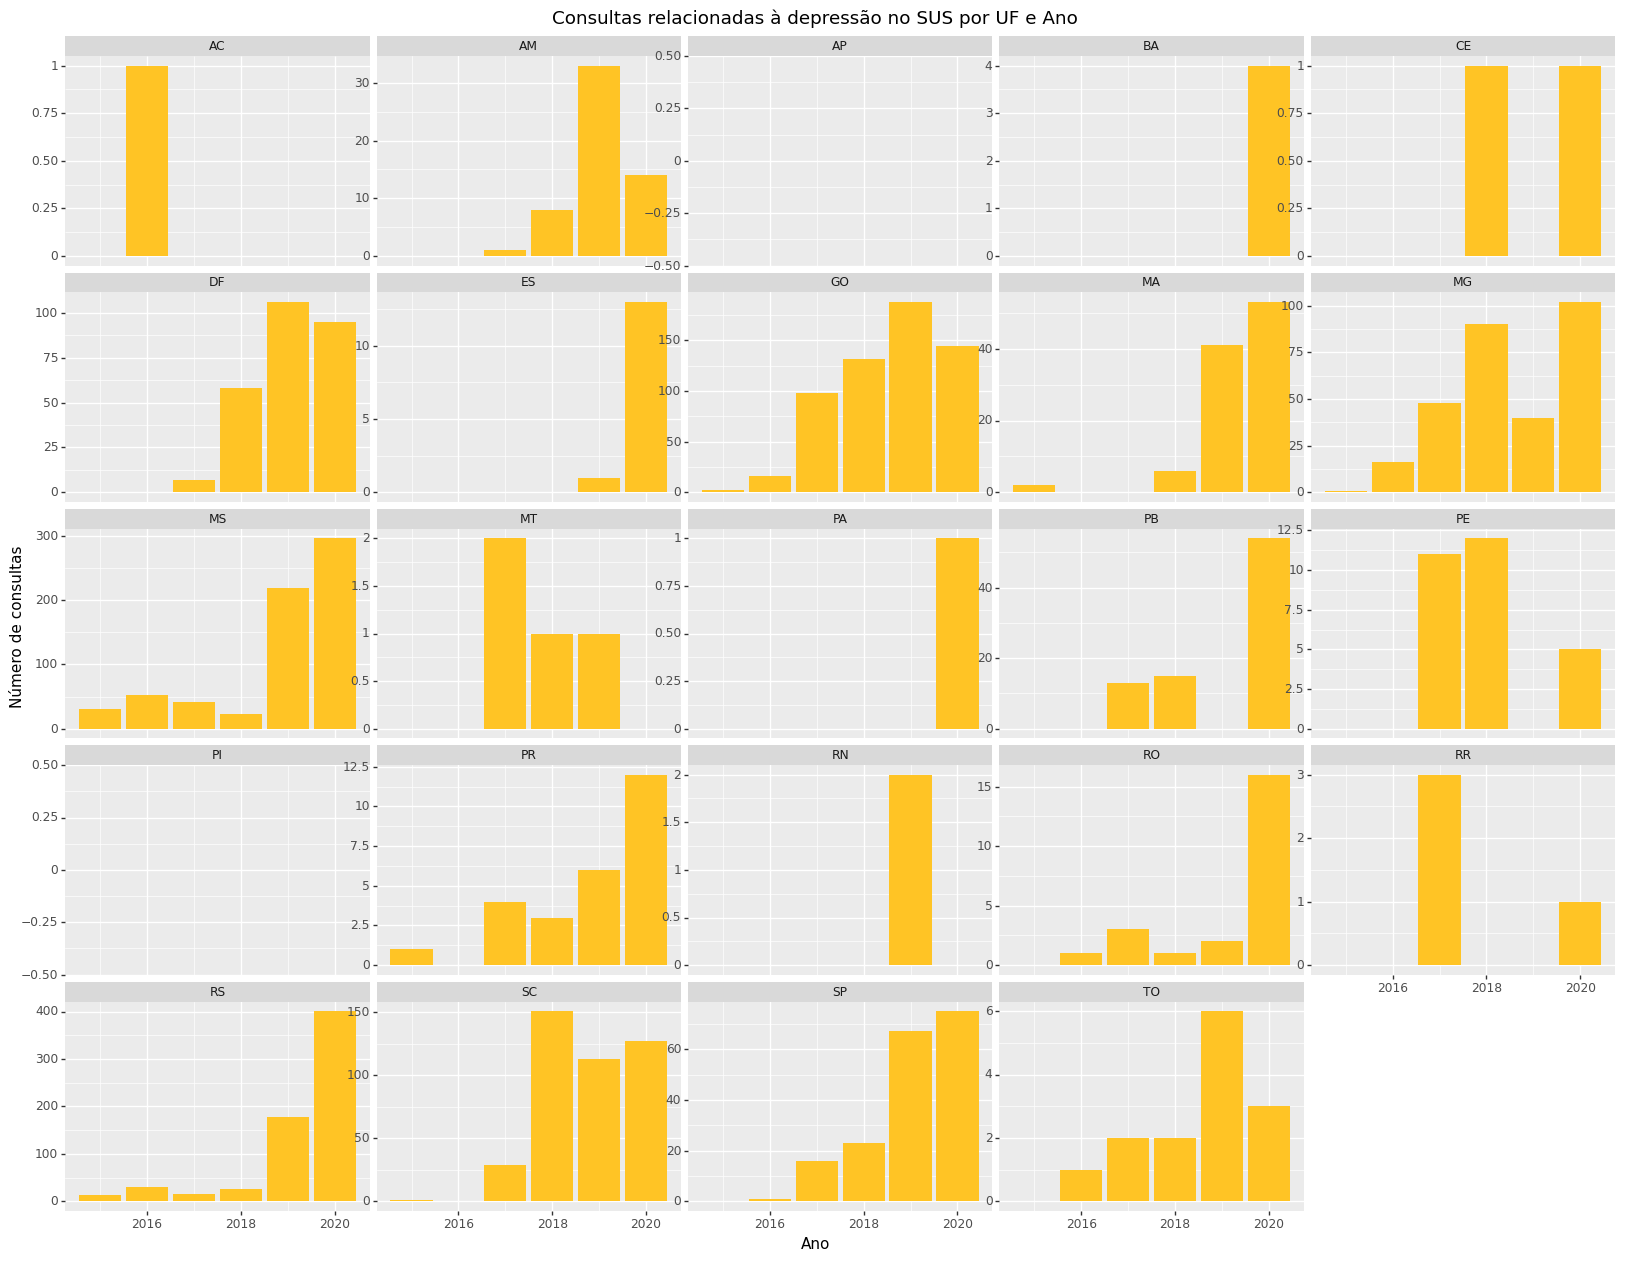

<ggplot: (8730522491557)>

In [ ]:
(
ggplot(data = sus,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_bar(stat = 'identity', fill = '#ffc425') 
+ facet_wrap('~ UF', scales = 'free_y')
+ labs(title = "Consultas relacionadas à depressão no SUS por UF e Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ theme(figure_size = (20, 15))
)

In [ ]:
sus_8uf = sus.query(" UF in ('DF', 'GO', 'MA', 'MG', 'MS', 'RS', 'SP', 'SC') ")
sus_8uf.query(" UF == 'DF' ")

,ANO,UF,total
23,2017,DF,7
42,2018,DF,58
61,2019,DF,106
81,2020,DF,95


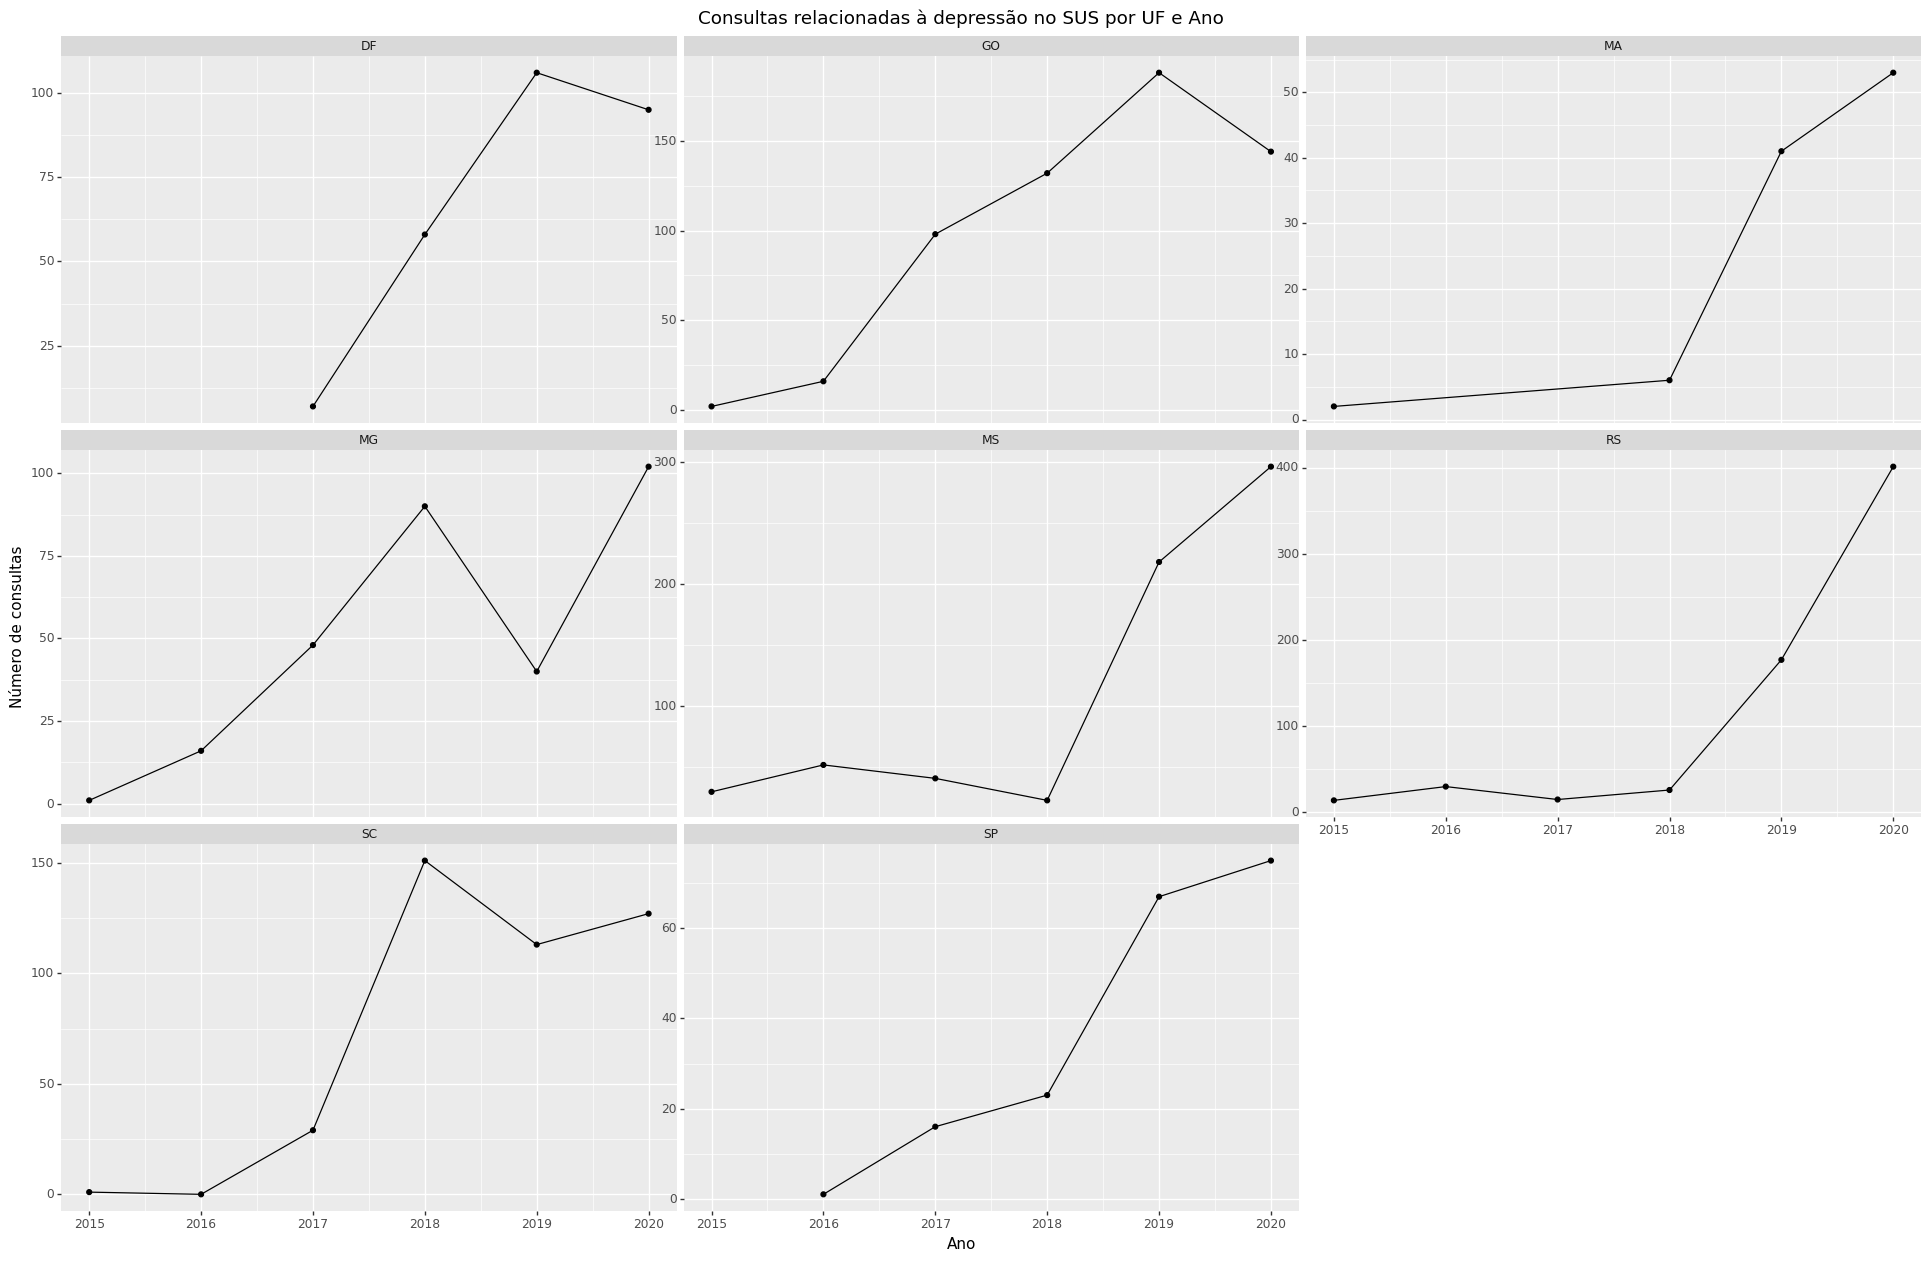

<ggplot: (8730510617073)>

In [ ]:
# Com linha
(
ggplot(data = sus_8uf,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_point() 
+ geom_line() 
+ facet_wrap('~ UF', scales = 'free_y')
+ labs(title = "Consultas relacionadas à depressão no SUS por UF e Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ theme(figure_size = (24, 15))
)

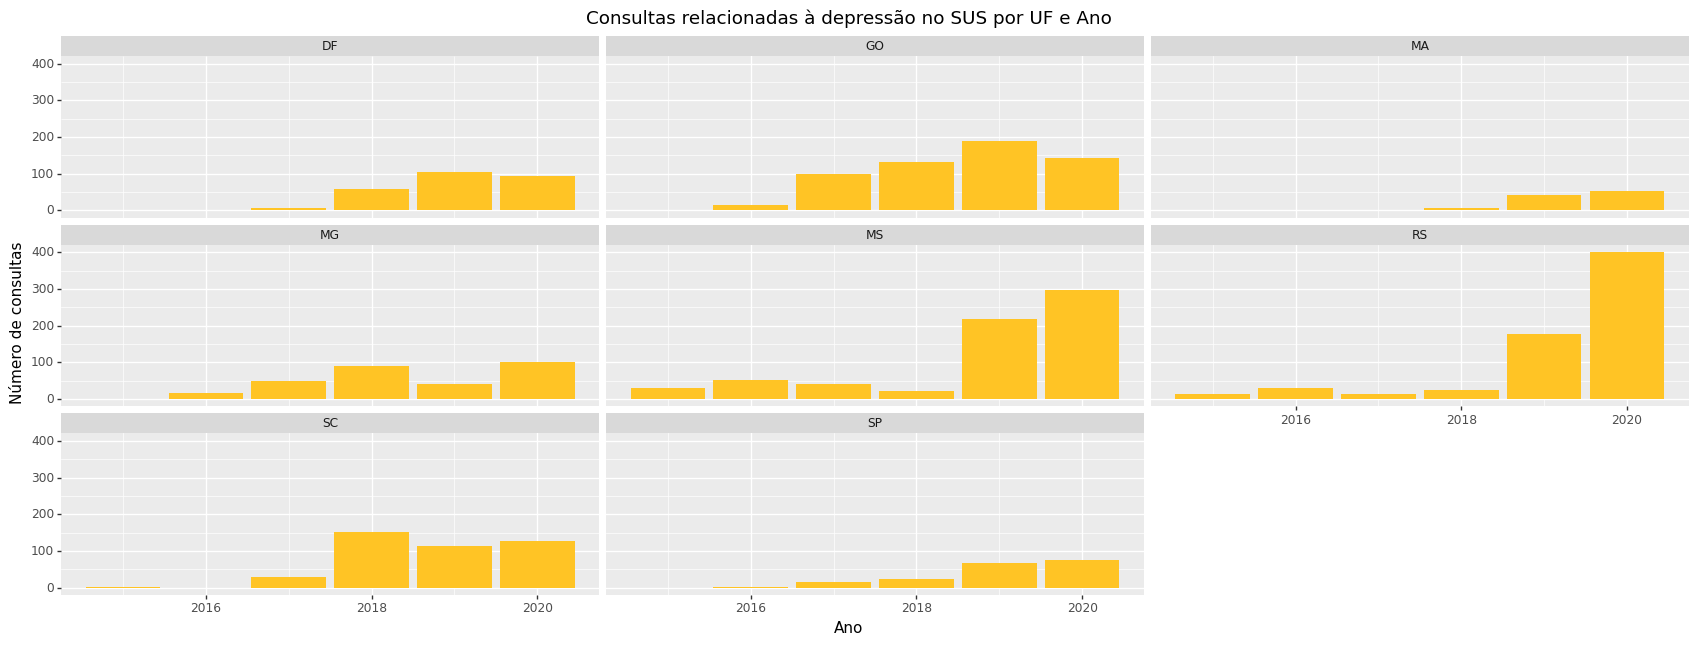

<ggplot: (8730510472005)>

In [ ]:
# Com barra
(
ggplot(data = sus_8uf,
       mapping = aes(x = 'ANO', y = 'total')) 
+ geom_bar(stat = 'identity', fill = '#ffc425') 
+ facet_wrap('~ UF')
+ labs(title = "Consultas relacionadas à depressão no SUS por UF e Ano", 
       x = "Ano", 
       y = "Número de consultas")
+ theme(figure_size = (21, 7))
)

JOIN: `pop_carc_abs` e `SUS`

In [ ]:
# Obj auxiliar
sus_aux = sus
sus_aux = sus_aux.rename({'ANO':'ano', 'UF':'uf', 'total':'cons_sus'}, axis = 'columns')
sus_aux['uf'] = sus_aux['uf'].str.lower()
sus_aux

,ano,uf,cons_sus
0,2015,go,2
1,2015,ma,2
2,2015,mg,1
3,2015,ms,30
4,2015,pr,1
...,...,...,...
93,2020,rr,1
94,2020,rs,401
95,2020,sc,127
96,2020,sp,75


In [ ]:
pop_carc_abs_aux = pop_carc_abs[['value', 'uf', 'ano']]
pop_carc_abs_aux = pop_carc_abs_aux.rename({'value':'pop_carc'}, axis = 'columns')
pop_carc_abs_aux

,pop_carc,uf,ano
0,4244.0,ac,2014
4,4649.0,ac,2015
6,6100.0,ac,2016
10,6551.0,ac,2017
14,7914.0,ac,2018
...,...,...,...
676,3455.0,to,2016
680,4050.0,to,2017
684,4347.0,to,2018
688,4491.0,to,2019


In [ ]:
inner_merged_total = pd.merge(sus_aux, pop_carc_abs_aux, on = ["uf", "ano"], how = 'outer')
#inner_merged_total.query('uf == "ac" ')
len(inner_merged_total)

188

In [ ]:
pop_carc_prop = df_infogeral.query(' mes == "dez" & level != "População carcerária"')
pop_carc_prop_aux = pop_carc_prop[['value', 'uf', 'ano']]
pop_carc_prop_aux = pop_carc_prop_aux.rename({'value':'tx_100k_hab'}, axis = 'columns')
pop_carc_prop_aux

,tx_100k_hab,uf,ano
1,535.130889,ac,2014
5,578.584292,ac,2015
7,759.200000,ac,2016
11,789.639582,ac,2017
15,910.424324,ac,2018
...,...,...,...
677,228.000000,to,2016
681,261.257623,to,2017
685,279.508677,to,2018
689,285.529727,to,2019


In [ ]:
inner_merged_total = pd.merge(inner_merged_total, pop_carc_prop_aux, on = ["uf", "ano"], how = 'outer')
#inner_merged_total.head()
len(inner_merged_total)

188

In [ ]:
df_suic_ano_aux = df_suic_ano
df_suic_ano_aux = df_suic_ano_aux.rename({'total':'suic'}, axis = 'columns')
df_suic_ano_aux.query(' uf == "al" ')

,uf,ano,suic
7,al,2014,1.0
8,al,2015,1.0
9,al,2016,1.0
10,al,2017,1.0
11,al,2018,2.0
12,al,2019,0.0
13,al,2020,3.0


In [ ]:
inner_merged_total = pd.merge(inner_merged_total, df_suic_ano_aux, on = ["uf", "ano"], how = 'outer')
#inner_merged_total.sort_values(by = ['ano', 'uf'])df_unmelted = df_melted.pivot(index='ID', columns='Attribute')
len(inner_merged_total)

189

Passando p data.frame

In [ ]:
cons_sus = inner_merged_total[['ano', 'uf', 'cons_sus']]
df_cons_sus_unmelted = cons_sus.pivot(index = 'uf', columns = 'ano')
df_cons_sus_unmelted
df_cons_sus_unmelted.to_csv('df_cons_sus.csv')#, index = False)

In [ ]:
pop_carc = inner_merged_total[['ano', 'uf', 'pop_carc']]
df_pop_carc_unmelted = pop_carc.pivot(index = 'uf', columns = 'ano')
df_pop_carc_unmelted.to_csv('df_pop_carc.csv')#, index = False)

In [ ]:
tx_100k_hab = inner_merged_total[['ano', 'uf', 'tx_100k_hab']]
df_tx_100k_hab_unmelted = tx_100k_hab.pivot(index = 'uf', columns = 'ano')
df_tx_100k_hab_unmelted.to_csv('df_tx_100k_hab.csv')#, index = False)

In [ ]:
suic = inner_merged_total[['ano', 'uf', 'suic']]
suic_unmelted = suic.pivot(index = 'uf', columns = 'ano')
suic_unmelted.to_csv('df_suic.csv')#, index = False)

Análises Bivariadas

In [ ]:
inner_merged_total.head()

,ano,uf,cons_sus,pop_carc,tx_100k_hab,suic
0,2015,go,2.0,14428.0,218.252855,2.0
1,2015,ma,2.0,7892.0,114.306554,1.0
2,2015,mg,1.0,65687.0,314.757210,23.0
3,2015,ms,30.0,15787.0,595.458343,4.0
4,2015,pr,1.0,52608.0,471.270404,9.0


In [ ]:
inner_merged_total = inner_merged_total[inner_merged_total['ano'] != 2014]

In [ ]:
df_cons_sus_unmelted

cons_sus                                       
ano     2014  2015  2016  2017   2018   2019   2020
uf                                                 
ac       NaN   NaN   1.0   NaN    NaN    NaN    NaN
al       NaN   NaN   NaN   NaN    NaN    NaN    NaN
am       NaN   NaN   NaN   1.0    8.0   33.0   14.0
ap       NaN   NaN   NaN   NaN    NaN    0.0    NaN
ba       NaN   NaN   0.0   0.0    0.0    0.0    4.0
ce       NaN   NaN   0.0   0.0    1.0    NaN    1.0
df       NaN   NaN   NaN   7.0   58.0  106.0   95.0
es       NaN   NaN   NaN   NaN    NaN    1.0   13.0
go       NaN   2.0  16.0  98.0  132.0  188.0  144.0
ma       NaN   2.0   NaN   NaN    6.0   41.0   53.0
mg       NaN   1.0  16.0  48.0   90.0   40.0  102.0
ms       NaN  30.0  52.0  41.0   23.0  218.0  296.0
mt       NaN   NaN   NaN   2.0    1.0    1.0    NaN
pa       NaN   NaN   NaN   0.0    NaN    0.0    1.0
pb       NaN   NaN   NaN  13.0   15.0    0.0   54.0
pe       NaN   NaN   NaN  11.0   12.0    NaN    5.0
pi       NaN   NaN   NaN   NaN    0.0    0.0    NaN
pr       NaN   1.0   NaN   4.0    3.0    6.0   12.0
rj       NaN   NaN   NaN   NaN    NaN    NaN    NaN
rn       NaN   NaN   0.0   0.0    0.0    2.0    0.0
ro       NaN   0.0   1.0   3.0    1.0    2.0   16.0
rr       NaN   NaN   NaN   3.0    NaN    NaN    1.0
rs       NaN  14.0  30.0  15.0   26.0  177.0  401.0
sc       NaN   1.0   0.0  29.0  151.0  113.0  127.0
se       NaN   NaN   NaN   NaN    NaN    NaN    NaN
sp       NaN   NaN   1.0  16.0   23.0   67.0   75.0
to       NaN   NaN   1.0   2.0    2.0    6.0    3.0

In [ ]:
inner_merged_total

,ano,uf,cons_sus,pop_carc,tx_100k_hab,suic
0,2015,go,2.0,14428.0,218.252855,2.0
1,2015,ma,2.0,7892.0,114.306554,1.0
2,2015,mg,1.0,65687.0,314.757210,23.0
3,2015,ms,30.0,15787.0,595.458343,4.0
4,2015,pr,1.0,52608.0,471.270404,9.0
...,...,...,...,...,...,...
182,2019,se,NaN,6360.0,276.678604,1.0
183,2020,se,NaN,6486.0,279.710991,1.0
185,2015,sp,NaN,233067.0,524.967247,31.0
187,2015,to,NaN,3283.0,216.681649,3.0


/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 64 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


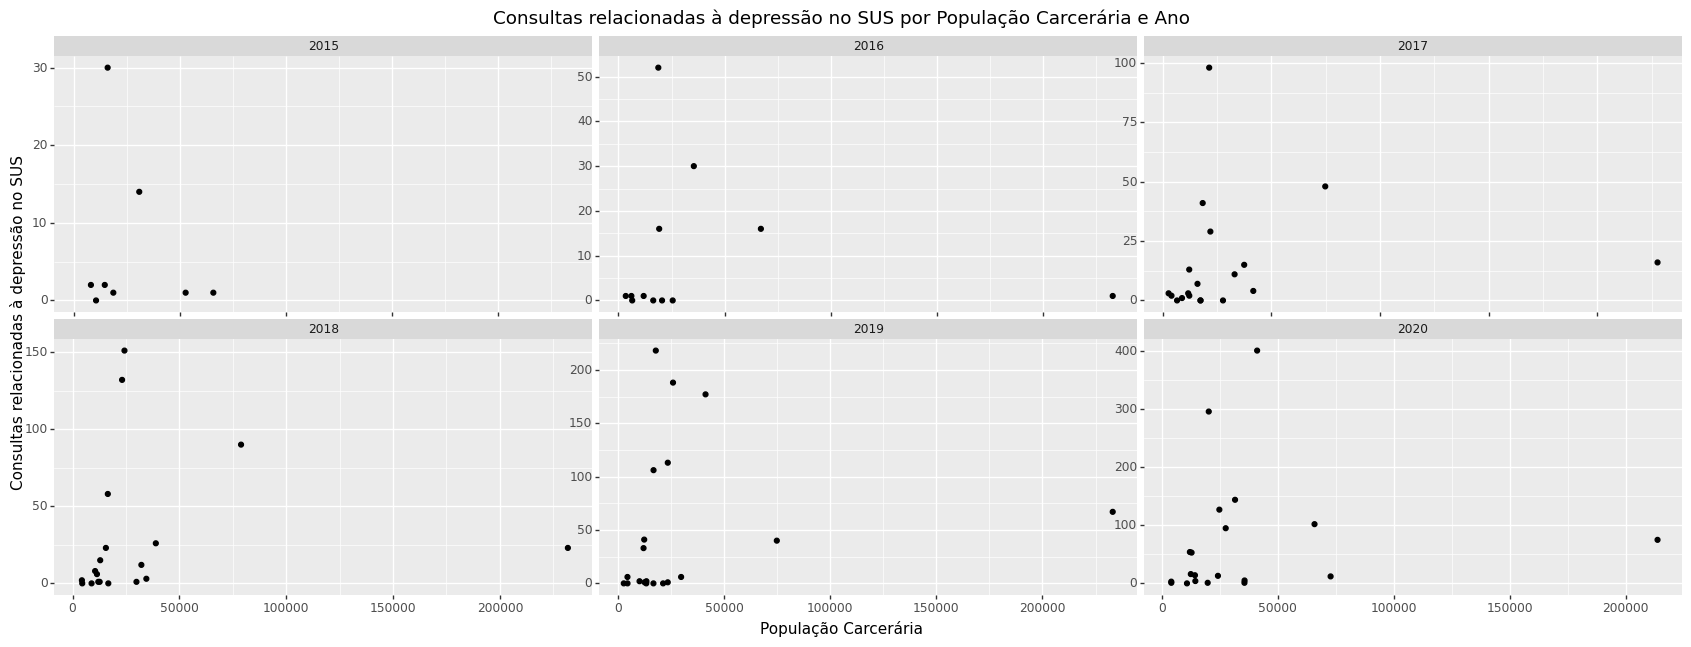

<ggplot: (8765341446621)>

In [ ]:
# pop_carc vs Consultas no SUS
(
ggplot(data = inner_merged_total,
       mapping = aes(x = 'pop_carc', y = 'cons_sus')) 
+ geom_point() 
+ facet_wrap('~ ano', scales = "free")
+ theme(figure_size = (21, 7))
+ labs(title = "Consultas relacionadas à depressão no SUS por População Carcerária e Ano", 
       x = "População Carcerária", 
       y = "Consultas relacionadas à depressão no SUS")
)

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 64 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


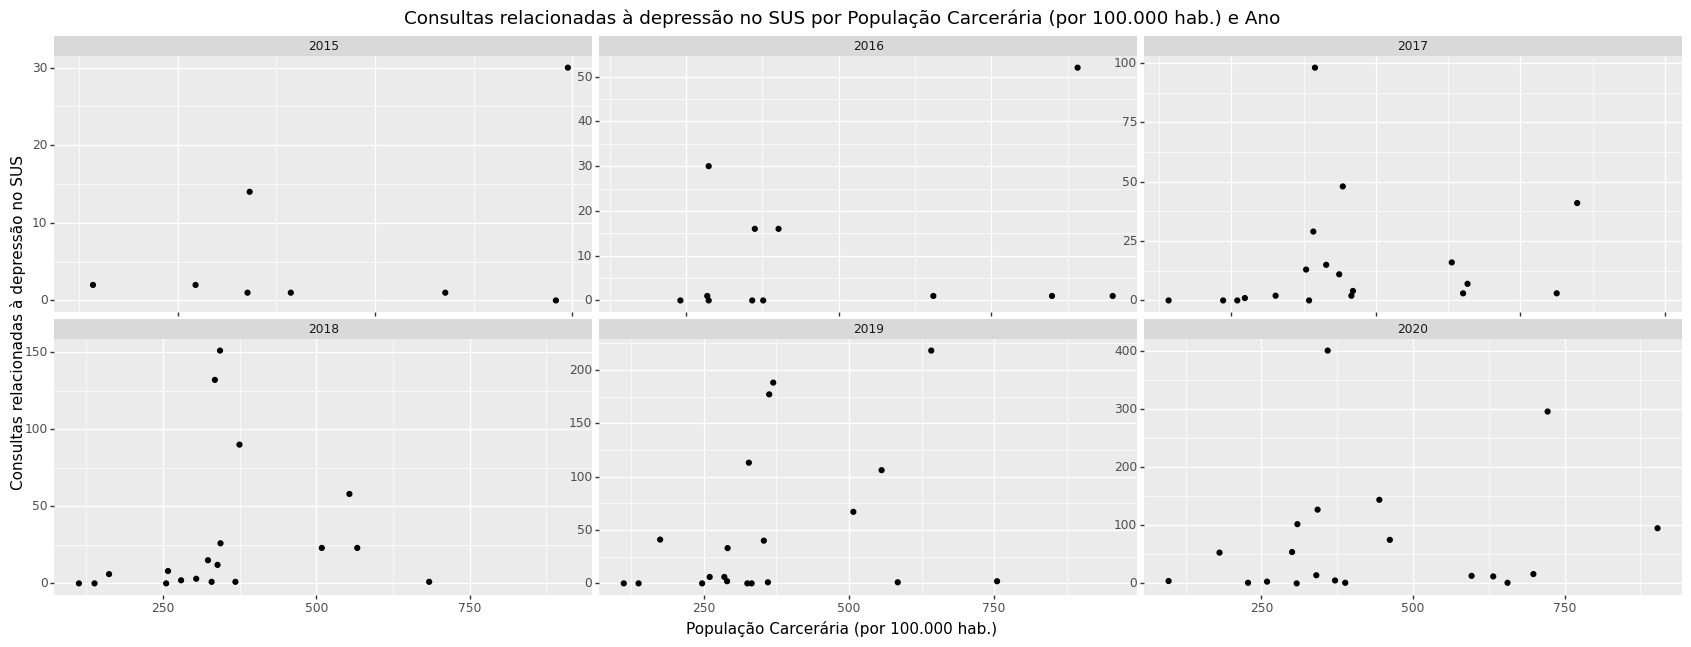

<ggplot: (8765339365653)>

In [ ]:
#inner_merged_total_semsp = inner_merged_total[inner_merged_total["uf"] != "sp"]

(
ggplot(data = inner_merged_total,
       mapping = aes(x = 'tx_100k_hab', y = 'cons_sus')) 
+ geom_point() 
+ facet_wrap('~ ano', scales = "free")
+ theme(figure_size = (21, 7))
+ labs(title = "Consultas relacionadas à depressão no SUS por População Carcerária (por 100.000 hab.) e Ano", 
       x = "População Carcerária (por 100.000 hab.)", 
       y = "Consultas relacionadas à depressão no SUS")
)